<a href="https://colab.research.google.com/github/ddemirel1/Deep-Learning-With-Python/blob/main/ReutersMulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

Single-label, multiclass classification


In [22]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [23]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.5746 - accuracy: 0.5595 - val_loss: 1.6887 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.3984 - accuracy: 0.7041 - val_loss: 1.3076 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0649 - accuracy: 0.7651 - val_loss: 1.1491 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8461 - accuracy: 0.8196 - val_loss: 1.0702 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6873 - accuracy: 0.8540 - val_loss: 1.0572 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5546 - accuracy: 0.8852 - val_loss: 0.9403 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4490 - accuracy: 0.9065 - val_loss: 0.9330 - val_accuracy: 0.8090
Epoch 8/20
16

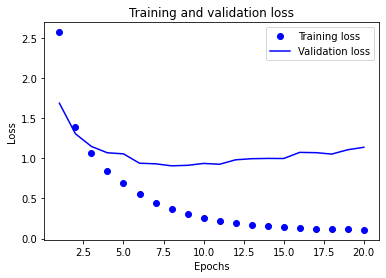

In [29]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

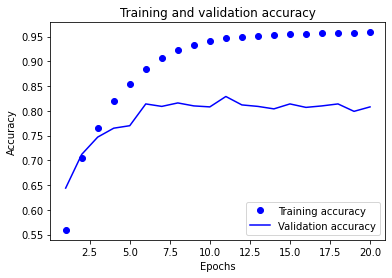

In [32]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
predictions = model.predict(x_test)

In [36]:
np.argmax(predictions[0])

3